In [ ]:
%load_ext autoreload
%autoreload 2

In [4]:
from lecture.tools import hideCode,FlexSlide

###  Q: Are jupyter notebook slides useful to make and distribute your lectures?
<img src="images/cat.jpg" alt="Drawing" style="width: 300px;"/>
A: maybe, decide for yourself

## Current ways to present lectures

* Using a chalkboard (fine, forces students to stay alert, but hard to copy & distribute)



* Libreoffice/powerpoint (fine, does its job, but not suitable for live coding. Can be a pain in the A. to reformat)

* Latex beamer slides (looks nice, only for people who have a lot of time, hard to embed videos, animations etc.) (edit: 27 April: it turns out that using rise and reveal.js also takes a lot of time, so I guess I killed that argument.)

* Jupyter notebook slides (let's see what can be done with this)





## Advantages of using Jupyter notebook slides (together with reveal.js)

#### Pros
* Every modern browser can display the presentation including **mobile devices**
* Looks great and can be customized as a whole
* Easy formula manipulation using latex
* Can potentially be hosted on/as a static site (with limited functionality, work in progress)
* Write you slides in Markdown (easy to learn)
* Easy to integrate webbased content in there

#### Cons
* May be unexpected for your audience
* Markdown has limitations (is not very extensive). Special formatting requires some html and css knowledge
* It is not: *what you see is what you get* (so iteration may be needed to get things right)
* more difficult to share (either people install a jupyter notebook server themselves or, a non-interactive version is shared, see the slide on decktape)

# More possiblities when using the jupyter notebook in combination with the rise extension (like this one)

* Run presentation directly froma jupyter notebook
    * Allows to dynamically run code cells (pretty cool!)
    * Use a chalkboard and draw on the screen or slides (also pretty cool!)
* more difficult to export to static html (no satisfying solution is present at the time of writing)

## Prepare your slides
* [Install the rise notebook extension](https://rise.readthedocs.io/en/stable/installation.html)
* Clone this template repository
* In Jupyter notebook go to   *edit*$\rightarrow$    *Edit Notebook Metadata*. And change the footer text and date in the rise section.
* Possibly change the logo image file
* Press `Alt-r` to view (check out [other rise shortcuts](https://rise.readthedocs.io/en/maint-5.5/customize.html#keyboard-shortcuts-and-jupyter-actions))

#### Do some live coding in your presentation
Note: this only works when the notebook is hosted from a jupyter notebook server



In [1]:
#let's make a silly print function and try executing it
from datetime import datetime
def testprint():
    print("blah blah blah at %s"%datetime.now())

testprint()

blah blah blah at 2020-12-16 11:31:01.236984


# So you can do live plotting with matplotlib

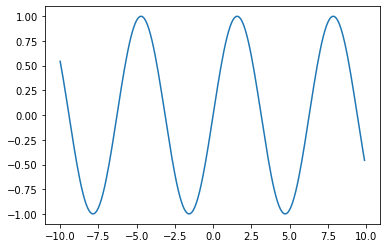

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

t=np.arange(-10,10,0.1)

sint=[math.sin(x) for x in t]

plt.plot(t,sint)
plt.show()

## You can also easily insert latex formula's in your cells
$$c = \sqrt{a^2 + b^2}$$

But please, don't overdo it with those formula's. It's a heavy cognitive burden for your audience 😉

<font size="2">PS. I just copy pasted the emoji from [here](https://emojipedia.org/)</font>

## You can insert images using the markdown syntax: 
`![alt text](images/catmissing.jpg)`

![alt text](images/catmissing.jpg)


## But if you want more control over the size and style of the image you need to insert some html:
`<img src="images/catmissing.jpg" alt="logo larger" style="width: 300px;"/>`

<img src="images/catmissing.jpg" alt="logo larger" style="width: 300px;"/>

In [7]:
slide=FlexSlide("# There are some python tools in [lecture/tools.py](lecture/tools.py) for more flexible slide layouts")
slide.addmd("You can add flexboxes with markdown content, by starting [a `FlexSlide` object](https://css-tricks.com/snippets/css/a-guide-to-flexbox/) and they will be dynamically positioned in your browser", flxwidth="flx50")
slide.addItems(["add a first bullet","and another bullet"],flxwidth="flx50",frag=True)
slide.addimg("images/catmissing.jpg",caption="Or images, which can also be added as fragments",width="400px",frag=True)

slide.display()

# There are some python tools in [lecture/tools.py](lecture/tools.py) for more flexible slide layouts
<div class="flxsld text_cell" >


<div class="flx50">

You can add flexboxes with markdown content, by starting [a `FlexSlide` object](https://css-tricks.com/snippets/css/a-guide-to-flexbox/) and they will be dynamically positioned in your browser</div>
<div class="flx50">

<ul><li class="fragment fade-in">add a first bullet</li><li class="fragment fade-in">and another bullet</li></ul></div>
<div class=" fragment fade-in">

<div ><img src="images/catmissing.jpg" alt="Or images, which can also be added as fragments" style="width:400px;" /><small>Or images, which can also be added as fragments</small></div></div>

</div>

## You can also embed svg images (use inkscape!)
<div class="flexcol">
<div>
    
* Edit your image in the [images folder ](images/) with Inkscape (and use Menu -> Text -> "Convert to Text" for textflow elements)
* Export your image as **optimized svg** and don't embed images but leave them in the `images/` folder
* Call the function `embedSVG(..)` in a code cell
* Bonus: directly add the *reveal.js* fragment codes (use inkscape xml editor and add class `fragment fade-in` to the appriopriate groups
* An example can be found on the subslide
</div>
<div>
<img src="images/inkscapesave.png" alt="inkscape dialog" style="width: 600px;"/>
</div>
</div>

In [3]:
slide2=FlexSlide("# Embed a fragmented SVG")
slide2.addSVG("images/cathere.svg",width="400px")
# embedSVG("images/cathere.svg",width="400px")
slide2.display()

# Embed a fragmented SVG
<div class="flxsld text_cell" >


<div ">

<svg xmlns="http://www.w3.org/2000/svg" xmlns:cc="http://creativecommons.org/ns#" xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#" xmlns:xlink="http://www.w3.org/1999/xlink" width="400px" version="1.1" viewBox="0 0 190.5 197.11">
 <metadata>
  <rdf:RDF>
   <cc:Work rdf:about="">
    <dc:format>image/svg+xml</dc:format>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:title/>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <g transform="translate(-12.851 -48.764)">
  <image x="12.851" y="48.764" width="190.5" height="197.11" preserveAspectRatio="none" xlink:href="images/catmissing.jpg"/>
  <image x="26.08" y="190.79" width="28.474" height="21.356" stroke-width="13.938" preserveAspectRatio="none" xlink:href="images/cat.jpg"/>
  <g class="fragment fade-up">
   <path d="m54.555 190.65c0.96594-1.2727 2.661-2.3827 2.8978-3.8181 0.08781-0.53225-1.5345 0.12996-2.2679 0-0.34572-0.0613-0.43722-0.4229-0.75595-0.53587-0.4443-0.15748-3.4712 0.1458-3.7798 0-0.46882-0.22156-0.35753-0.78933-0.75595-1.0718-0.17818-0.12631-0.50397 0-0.75595 0-0.50397 0-1.0611 0.15977-1.5119 0-0.22538-0.0799 0.22538-0.45599 0-0.53587-0.68252-0.24192-3.6695 0.20467-4.5357 0-0.33807-0.0799-0.41788-0.45599-0.75595-0.53588-0.71716-0.16946-1.5119 0-2.2679 0h-5.2917-2.2679c-0.25198 0-0.57777-0.12631-0.75595 0s0.11269 0.37611 0 0.53588c-0.31874 0.45188-1.0667 0.67723-1.5119 1.0718-0.78707 0.69741-1.4808 1.4461-2.2679 2.1435-0.50397 0.44656-2.0159 1.2504-2.2679 1.6076-0.22538 0.31953 0.27955 0.7745 0 1.0718-1.8415 1.9581-1.1066-0.57457-2.2679 1.0718-0.22538 0.31953 0.15937 0.73283 0 1.0718-1.8252 3.8816 0.21794-0.84487-1.5119 1.6076-0.11269 0.15976 0.06112 0.36258 0 0.53587-0.19326 0.54801-0.62495 1.0505-0.75595 1.6076-0.12428 0.52859 0 1.0718 0 1.6076 0 0.17862 0.07969 0.36642 0 0.53587-0.17818 0.37892-0.57777 0.69283-0.75595 1.0718-0.07969 0.16946 0.07968 0.36641 0 0.53588-0.17818 0.37892-0.57777 0.69282-0.75595 1.0718-0.07968 0.16946 0.06112 0.36259 0 0.53587-0.19326 0.548-0.56269 1.0596-0.75595 1.6076-0.06111 0.1733 0.07968 0.36643 0 0.53588-0.17818 0.37893-0.4434 0.73942-0.75595 1.0718-0.19767 0.21019-0.64326 0.29622-0.75595 0.53587-0.34406 0.73169 0.34406 2.4836 0 3.2153-0.11269 0.23965-0.64326 0.29623-0.75595 0.53587-0.04772 0.1015-0.04772 3.1138 0 3.2153 0.11269 0.23965 0.64326 0.29622 0.75595 0.53588 0.15937 0.33891 0 0.7145 0 1.0718 0 0.17863-0.11269 0.37611 0 0.53588 0.5789 0.82073 1.3471 0.41906 2.2679 1.0718 0.17818 0.12631-0.22538 0.45599 0 0.53587 0.45076 0.15977 1.0338-0.11297 1.5119 0 0.33807 0.0799 0.43722 0.42291 0.75595 0.53588 1.2137 0.43019 2.5397 0.68107 3.7798 1.0718 1.0298 0.32443 1.9547 0.81913 3.0238 1.0718 0.41954 0.0991 5.1414 0 6.0476 0h8.3155c0.7097 0 3.3466 0.10235 3.7798 0 0.33807-0.0799 0.40651-0.48634 0.75595-0.53588 0.98836-0.14012 2.0159 0 3.0238 0h4.5357c0.25198 0 0.57777 0.12631 0.75595 0 0.39842-0.28243 0.35753-0.78932 0.75596-1.0718 0.35636-0.25261 1.0611 0.15977 1.5119 0 0.31874-0.11296 0.43722-0.4229 0.75595-0.53587 0.45076-0.15977 1.0611 0.15977 1.5119 0 0.31874-0.11297 0.50397-0.35726 0.75595-0.53588s0.59658-0.30993 0.75595-0.53587c0.11269-0.15977-0.11269-0.37611 0-0.53588 0.15937-0.22594 0.50397-0.35725 0.75595-0.53587 0.50397-0.35725 1.1166-0.65138 1.5119-1.0718 0.13978-0.14864-0.07968-0.36642 0-0.53588 2.1415-3.0361-0.28173 0.79883 0.75595-2.1435-0.45563-0.9699 1.2246-0.99663 1.5119-1.6076 0.31874-0.67783-0.31874-1.4657 0-2.1435 0.11269-0.23966 0.66952-0.29082 0.75595-0.53588 0-3.8008-0.53454-0.31391 0.75595-2.1435 0.11269-0.15977 0-0.35725 0-0.53588 0-0.35724-0.12223-0.72516 0-1.0718 0.13666-0.38749 0.57777-0.69283 0.75595-1.0718 0.0527-0.11207 0.0527-2.5673 0-2.6794-0.17818-0.37892-0.57777-0.69283-0.75595-1.0718-0.07968-0.16946 0.11269-0.37611 0-0.53588-0.15937-0.22594-0.64326-0.29622-0.75595-0.53588-0.15937-0.33891 0.15937-0.73282 0-1.0718-0.11269-0.23964-0.59658-0.30993-0.75595-0.53587-0.11269-0.15977 0.07968-0.36642 0-0.53588-0.17818-0.37893-0.50397-0.71449-0.75595-1.0718-0.25198-0.35725-0.4434-0.73942-0.75595-1.0718-0.19767-0.21019-0.64326-0.29623-0.75595-0.53588-0.15937-0.33892 0.35636-0.81913 0-1.0718-0.35636-0.25261-1.0611 0.15977-1.5119 0-0.22538-0.0799 0.11269-0.37611 0-0.53588-1.573-2.2302 0.05219 0.57287-1.5119-0.53588-0.39842-0.28242-0.35753-0.78931-0.75595-1.0718-0.17818-0.1263-0.61618 0.14863-0.75595 0-0.44201-0.46999-0.31394-1.1376-0.75595-1.6076-0.27955-0.29726-1.0611 0.15976-1.5119 0-2.6421-0.93647 1.4075-0.074-0.75595-1.6076-0.25199-0.17863-0.3996 0.53588-0.75596 0.53588-0.25198 0 0.17818-0.40957 0-0.53588-0.17818-0.12631-0.50397 0-0.75595 0-1.0079 0-2.022 0.0789-3.0238 0-7.2483-0.57091-1.8631-0.53588-4.5357-0.53588h-1.5119c-0.25199 0-0.94263-0.11998-0.75595 0 2.9548 1.8992 6.1316 3.6172 9.1974 5.4257" fill="none" stroke="#f70d0d" stroke-width="4.265"/>
   <text x="71.059372" y="217.01552" fill="#f70d0d" font-family="sans-serif" font-size="2.4694px" letter-spacing="0px" text-align="justify" word-spacing="0px" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal;line-height:1.25" xml:space="preserve"><tspan x="71.059372" y="217.01552"><tspan x="71.059372" y="217.01552" fill="#f70d0d" font-size="16.933px">here</tspan></tspan></text>
  </g>
 </g>
</svg></div>

</div>

# Want if I want to print the slides to a pdf and spam my colleagues inbox?

[Try this](https://rise.readthedocs.io/en/stable/exportpdf.html)
* The decktape solution worked for me and there is a [small bash script](exportToPdf.sh) which may help you with this.
* Note: if you want to produce a pdf for printing, you may want to consider using a light theme so students don't have to buy a new cartridge every time the print your lecture. Please set the `{"rise","theme"}` variable in your jupyter notebook metadata


# That's all for now

Here's some food for throught:
* [Reveal.js (the underlying javascript which makes this possible)](https://revealjs.com/#/)
* [Working with Jupyter notebook slides](https://www.markroepke.me/posts/2019/05/23/creating-interactive-slideshows-in-jupyter.html)

* [tips and tricks](https://www.markroepke.me/posts/2019/06/05/tips-for-slideshows-in-jupyter.html)

* [rise nbextension](https://rise.readthedocs.io/en/stable/)
* [working with flexboxes](https://css-tricks.com/snippets/css/a-guide-to-flexbox/)
### Issues and TODO
* enable better export to static html (respecting footer and reveal theme, thgese are currently lost)
* more consistent coloring and font use (modify rise.css)
* Extent the FlexSlide class with a more consistent calling
* jupyterlab doesn't seem to respect the latex codes so formula's aren't rendered properly classic jupyter notebook works though